In [ ]:
######## Random draft file testing out the different built models on different and real and fake files to see any 
# to find patterns between the models. Lot's of functions built and variations of those functions as well for different models

#### note: these functions were changed while testing. those functions were scraped to reduce redundancy

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
fixed_length = 500
from pydub import AudioSegment
from pydub.silence import split_on_silence

import librosa
import numpy as np
def fourier(audio_path):
# Load the audio file
    audio, sr = librosa.load(audio_path)

    # Calculate the FFT
    fft = np.fft.fft(audio)

    # Calculate the frequencies
    freqs = np.fft.fftfreq(len(audio), 1.0 / sr)

    # Define the Fourier series function
    def fourier_series(t, freqs, amps):
        return np.sum([amp * np.cos(2 * np.pi * f * t) for amp, f in zip(amps, freqs)], axis=0)

    # Calculate the Fourier series values
    t = np.linspace(0, len(audio) / sr, len(audio))
    amps = np.abs(fft)
    freqs = freqs
    fourier_series_values = fourier_series(t, freqs, amps)

    # Calculate the RMS value
    def rms(signal):
        return np.sqrt(np.mean(signal ** 2))

    rms_value = rms(fourier_series_values)

    print(f'RMS Value: {rms_value:.2f}')
import librosa
import numpy as np
import librosa
import numpy as np

def fourier3(audio_path, window_size=1024, overlap=0.5):
    # Load the audio file
    audio, sr = librosa.load(audio_path)

    # Initialize variables
    rms_values = []
    rss_values = []

    # Process the audio in chunks
    for i in range(0, len(audio), int(window_size * (1 - overlap))):
        chunk = audio[i:i+window_size]

        # Calculate the FFT
        fft = np.fft.fft(chunk)

        # Calculate the frequencies
        freqs = np.fft.fftfreq(len(chunk), 1.0 / sr)

        # Define the Fourier series function
        def fourier_series(t, freqs, amps):
            return np.sum([amp * np.cos(2 * np.pi * f * t) for amp, f in zip(amps, freqs)], axis=0)

        # Calculate the Fourier series values
        t = np.linspace(0, len(chunk) / sr, len(chunk))
        amps = np.abs(fft)
        freqs = freqs
        fourier_series_values = fourier_series(t, freqs, amps)

        # Calculate the RMS and RSS values
        def rms(signal):
            return np.sqrt(np.mean(signal ** 2))

        def rss(signal):
            return np.sqrt(np.sum(signal ** 2))

        rms_value = rms(chunk)
        rms_values.append(rms_value)

        rss_value = rss(chunk)
        rss_values.append(rss_value)

        rss_fourier_value = rss(fourier_series_values)
        rss_values.append(rss_fourier_value)

    return (np.mean(rms_values), np.mean(rss_values))
def fourier2(audio_path, window_size=1024, overlap=0.5):
    # Load the audio file
    audio, sr = librosa.load(audio_path)

    # Initialize variables
    rms_values = []

    # Process the audio in chunks
    for i in range(0, len(audio), int(window_size * (1 - overlap))):
        chunk = audio[i:i+window_size]

        # Calculate the FFT
        fft = np.fft.fft(chunk)

        # Calculate the frequencies
        freqs = np.fft.fftfreq(len(chunk), 1.0 / sr)

        # Define the Fourier series function
        def fourier_series(t, freqs, amps):
            return np.sum([amp * np.cos(2 * np.pi * f * t) for amp, f in zip(amps, freqs)], axis=0)

        # Calculate the Fourier series values
        t = np.linspace(0, len(chunk) / sr, len(chunk))
        amps = np.abs(fft)
        freqs = freqs
        fourier_series_values = fourier_series(t, freqs, amps)

        # Calculate the RMS value
        def rms(signal):
            return np.sqrt(np.mean(signal ** 2))

        rms_value = rms(fourier_series_values)
        rms_values.append(rms_value)

    return np.mean(rms_values)

# Example usage
def fourier_series(t, freqs, amps, phases):
    return np.sum([amp * np.cos(2 * np.pi * f * t + phase) for amp, f, phase in zip(amps, freqs, phases)], axis=0)
def rss(signal1, signal2):
    return np.sqrt(np.sum((signal1 - signal2) ** 2))

import librosa
import numpy as np
import tensorflow as tf
import librosa
import numpy as np
import tensorflow as tf


import librosa
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict(audio_path):
    ## Load the audio file and remove silence
    y, sr = librosa.load(audio_path, sr=None)
    y, _ = librosa.effects.trim(y)

    ## Calculate the FFT
    fft_y = np.fft.fft(y)

    ## Calculate the noise spectrum
    noise_spectrum = np.abs(fft_y)

    ## Calculate the noise threshold
    noise_threshold = np.mean(noise_spectrum) * 0.5

    ## Remove noise by thresholding the FFT
    fft_y[noise_spectrum < noise_threshold] = 0

    ## Calculate the IFFT
    y_denoised = np.real(np.fft.ifft(fft_y))

    ## Plot and save the waveform image
    plt.figure(figsize=(14, 5))
    plt.plot(y)
    plt.title('Waveform')
    waveform_image_path = 'workplz.png'
    plt.savefig(waveform_image_path)
    plt.close()

    ## Load the image
    img = image.load_img(waveform_image_path, target_size=(128, 128))
    img2 = image.load_img(waveform_image_path, target_size=(224, 224))

    ## Convert the image to a numpy array
    img_array = image.img_to_array(img)
    img2_array = image.img_to_array(img2)

    ## Normalize the image
    img_array /= 255.0
    img2_array /= 255.0

    ## Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    img2_array = np.expand_dims(img2_array, axis=0)

    ## Load the models
    model1 = tf.keras.models.load_model('waveform-image-CNN.keras')
    model2 = tf.keras.models.load_model('inversemodel-VG616-Waveform.keras')
    model3 = tf.keras.models.load_model('waveform-image-CNN-EfficientNet.h5')
    model4 = tf.keras.models.load_model('inversemodel-VG616-Waveformaugmented.h5')
    model5 = tf.keras.models.load_model('waveform-image-CNNaugmented2.h5')
    model6 = tf.keras.models.load_model('inversemodel-VG616-Waveformaugmented2.h5')
    model7 = tf.keras.models.load_model('inversemodel-VG616-WaveformaugmentedTRIM.h5')
    model8 = tf.keras.models.load_model('waveform-image-CNNaugmentedTRIM.h5')
    ## Make predictions
    x = model1.predict(img_array)
    y = model2.predict(img2_array)
    z = model3.predict(img2_array)
    a = model4.predict(img2_array)
    b = model5.predict(img_array)
    c = model6.predict(img2_array)
    d = model7.predict(img2_array)
    e = model8.predict(img_array)

    ## Print the predictions
    avg = (x+y+b+e)*0.25
    print(x)
    print(y)
    print(z)
    print(a)
    print(b)
    print(c)
    print(d)
    print(e)
    print(avg)

In [45]:
import librosa
import numpy as np

def wiener_filter(audio, noise_power_spectrum):
    """
    Apply Wiener filter to reduce noise in the audio signal.
    
    Args:
        audio (numpy.ndarray): The input audio signal.
        noise_power_spectrum (numpy.ndarray): The power spectrum of the noise.
    
    Returns:
        numpy.ndarray: The noise-reduced audio signal.
    """
    # Calculate the power spectrum of the audio signal
    audio_power_spectrum = np.abs(np.fft.fft(audio)) ** 2
    
    # Calculate the Wiener filter coefficients
    wiener_coefficients = audio_power_spectrum / (audio_power_spectrum + noise_power_spectrum)
    
    # Apply the Wiener filter in the frequency domain
    filtered_audio_spectrum = np.fft.fft(audio) * wiener_coefficients
    
    # Convert the filtered audio spectrum back to the time domain
    filtered_audio = np.real(np.fft.ifft(filtered_audio_spectrum))
    
    return filtered_audio

def fourier(audio_file, window_size=1024, overlap=0.5):
    # Load the audio file
    audio, sr = librosa.load(audio_file)
    audio, _ = librosa.effects.trim(audio)

    # Initialize variables
    rss_errors = []

    # Process the audio in chunks
    for i in range(0, len(audio), int(window_size * (1 - overlap))):
        chunk = audio[i:i+window_size]

        # Estimate the noise power spectrum
        noise_power_spectrum = estimate_noise_power_spectrum(chunk)

        # Apply the Wiener filter to reduce noise
        clean_chunk = wiener_filter(chunk, noise_power_spectrum)

        # Calculate the FFT
        fft = np.fft.fft(clean_chunk)

        # Extract the Fourier coefficients
        freqs = np.fft.fftfreq(len(clean_chunk), 1.0 / sr)
        amps = np.abs(fft)
        phases = np.angle(fft)

        # Synthesize the waveform using Fourier series
        t = np.linspace(0, len(clean_chunk) / sr, len(clean_chunk))
        synthesized_waveform = fourier_series(t, freqs, amps, phases)

        # Calculate the RSS error
        def rss(signal1, signal2):
            return np.sqrt(np.sum((signal1 - signal2) ** 2))

        rss_error = rss(clean_chunk, synthesized_waveform)
        rss_errors.append(rss_error)

    # Calculate the average RSS error
    avg_rss_error = np.mean(rss_errors)
    return rss_errors

def fourier_series(t, freqs, amps, phases):
    return np.sum([amp * np.cos(2 * np.pi * f * t + phase) for amp, f, phase in zip(amps, freqs, phases)], axis=0)

def estimate_noise_power_spectrum(audio):
    """
    Estimate the power spectrum of the noise in the audio signal.
    
    Args:
        audio (numpy.ndarray): The input audio signal.
    
    Returns:
        numpy.ndarray: The estimated power spectrum of the noise.
    """
    # Implement a noise estimation algorithm here
    # For example, you can use the Welch method to estimate the power spectrum
    noise_power_spectrum = np.ones_like(audio)
    return noise_power_spectrum


In [21]:
audio_path = r'C:\Users\alisa\Downloads\Demo+Clip-19658306-b27e-4437-8da6-139520a10538.wav'

rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: 2739.7850396347303


In [46]:
audio_path = r'C:\Users\alisa\Downloads\ali.wav'

rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: [0.0088442252137029, 0.38392883018376106, 2.041316433318796, 5.999324772687416, 10.443789399654072, 14.203841840063438, 10.61846291054174, 5.638654738502668, 23.513318884019327, 57.499283918779085, 87.53784393641472, 109.37526255899182, 101.91916316487237, 65.50876858783151, 74.37006106039371, 49.29693170435761, 42.388130741059165, 49.80462920749266, 68.43613861179203, 78.8002116717849, 132.8489862012107, 80.84212020327058, 5.873126776667485, 134.96190433197296, 262.2516605973399, 306.2749691164833, 439.40412589920913, 448.6802255123224, 383.9135007484224, 396.6729265510991, 438.01300758793724, 433.55301895399117, 430.6631390048033, 282.6765899268208, 96.89632146179218, 18.184098156654535, 1.5315321847559402, 0.8442838741850929, 1.9011035181033245, 1.1424234295646114, 0.46323140358609577, 0.004954749385301143, 1.4674387389853505e-06, 2.6336454547982583e-08, 4.492174050165097e-19, 0.0, 0.0, 1.5952320885181666e-29, 2.4084545803229057e-09, 3.252478465978419e-05, 3.5970704607672

In [47]:
audio_path = r"C:\Users\alisa\Downloads\ElevenLabs_2024-02-21T05_28_34_Me_ivc_s50_sb75_se0_b_m2 (1).wav"



rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: [12.527432788027834, 1872.9788642134488, 3061.6464383832517, 3985.976363746175, 4876.013473890485, 5297.023760896658, 6235.140553751171, 6619.2942077267735, 6584.307215179104, 6976.349655344813, 5376.969012109707, 2382.463589220634, 3676.3108646096707, 5275.504735348787, 5048.067040764148, 4290.684056960396, 3993.5244144989565, 3768.8172337920882, 3706.7834083042494, 3501.8331379472243, 2776.6794832576566, 1936.0189746286333, 1332.8833848298032, 739.8803544237204, 591.9195149843162, 507.11769584890186, 310.3787412957288, 70.29303482415625, 0.00037362633116357535, 0.0009674841109386313, 0.0009247573759480618, 0.0008741924222291455, 0.0008324060055685747, 0.0008044377942362836, 0.0008071136866460081, 0.0008272682484834934, 0.00149016778049198, 657.2023036321763, 2249.8768707447416, 3157.059401711414, 2761.206432456332, 1581.961617590986, 1025.7283644781635, 1298.6965700842488, 953.8181366231493, 374.0554775272866, 2282.229388326121, 3642.584847739696, 4153.818409172491, 3849.8

In [24]:
audio_path = r'C:\Users\alisa\Downloads\Brian (Male).wav'


rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: 3293.5717562315035


In [25]:
audio_path = r"C:\Users\alisa\Downloads\record_out (3).wav"

rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: 1162.9866682794984


In [26]:
audio_path = r"C:\Users\alisa\Downloads\record_out (4).wav"


rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: 1111.3700197544288


In [48]:
audio_path = r'C:\Users\alisa\Downloads\anderson.wav'


rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')



RMS Value: [0.06365676940028611, 0.05884538628351111, 0.006002658108092309, 0.002934522590584604, 0.0014757198327055713, 3.905594780799982e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0070228232431856e-30, 1.140706837439468e-09, 1.140504770841673e-09, 1.7734074325316022e-06, 0.003811388893303444, 0.01806805119362586, 0.33820891910504136, 242.49384486732336, 759.5697962898215, 1047.0536164798732, 1532.6663929655106, 1946.5193764413598, 1712.040749430729, 1090.1813237017152, 792.7707816532572, 758.2439643167747, 803.8302198481542, 931.1075660227318, 1042.1090356663515, 1073.6367362856736, 827.9644405939976, 484.59494727185063, 396.19542715908005, 452.041284935228, 545.817449027183, 585.6519833732042, 448.8036150891534, 262.302587700391, 118.48150555911198, 20.043224287688886, 13.161849648995785, 8.974401942593225, 172.2345922461901, 199.766967847015, 337.8894443296598, 561.0477972291351, 645.9728208820492, 806.5768294372691, 956.1113064685375, 946.7133658984883, 722.906905377

In [39]:
audio_path = r"C:\Users\alisa\Downloads\c9e250739d0d10ecebe923fe16ff339b.wav"

rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: [0.0, 0.0, 0.0, 0.0, 1.5686847589046963e-29, 9.482306474164764e-07, 3.754404052308518e-05, 0.00012170732303743769, 0.00011631869748174351, 0.00011967290488130076, 0.00012839913888344176, 0.00011593363027944405, 0.00011888580304422796, 0.00010462198911431206, 5.573582928584263e-05, 5.568090120914668e-05, 9.30463198542756e-05, 5.9396100268183654e-05, 3.488959469007364e-05, 5.90132103581958e-05, 9.75224611632231e-05, 8.144111527015123e-05, 7.612821841847336e-05, 0.00010642091528066144, 8.691998411797622e-05, 8.231087398297448e-05, 1.368582053282581e-05, 4.981732476409535e-27, 0.0, 0.0, 3.638790363703375e-09, 1.8561237316559915e-05, 0.00012647137081682415, 0.0001109473925039442, 0.00010402622201913014, 0.00019989193351127143, 0.0001841847322225695, 0.00014476800574360395, 0.0001196165303587651, 2.0639625286411834e-05, 4.59035767431262e-07, 5.06275421259871e-19, 1.2442825168481332e-05, 0.00011803702142039257, 0.00014954520801417436, 0.00010739202960817689, 0.00010807829539106636,

In [49]:
audio_path = r'C:\Users\alisa\Downloads\abel.wav'


rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: [0.00015568778318465545, 0.005658644689591627, 0.14201179854142712, 0.3625490258632246, 16.889515201589873, 93.53571575160913, 172.9650908945025, 242.66536640175386, 305.0474078773467, 349.65171318461296, 344.1981376388532, 351.10385328745815, 304.20624337882145, 152.8272236298878, 58.41579279068934, 8.222189813915358, 0.7739033251556124, 8.87170344367385, 12.427418828745733, 106.2288400597801, 205.4092525462296, 335.48173089325365, 464.0496703268087, 332.055020870178, 72.04828590520981, 141.66641851200725, 182.69878434981584, 98.8733390297568, 47.63358164968158, 183.6076496033656, 694.2622264097645, 800.7977534727925, 602.9924052089397, 756.2301871644985, 752.959571600474, 457.4094483097097, 499.6499000623603, 846.2395358205928, 991.2366729559296, 987.3033951792175, 1003.160281125021, 1075.706564755194, 1262.8084200508597, 1354.5062268405331, 1307.3900456156268, 1141.1666127950562, 870.7592641689381, 785.1753677456265, 693.0639535644095, 413.1519071968476, 220.8816050072709

In [29]:
audio_path = r'C:\Users\alisa\Downloads\harvard.wav'

rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: 1008.0314275736266


In [30]:
audio_path = r'C:\Users\alisa\Downloads\about-anger-179423.mp3'


rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: 6861.81768376602


In [31]:
audio_path = r'C:\Users\alisa\Downloads\thinkabout-76569.mp3'


rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: 1425.7355034432003


In [32]:
audio_path = r"C:\Users\alisa\Downloads\This is not Morgan Freeman  -  A Deepfake Singularity.mp3"

rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: 2082.104902396033


In [33]:


audio_path = r'C:\Users\alisa\Downloads\New Recording 31.wav'


rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: 1737.8153114150123


In [34]:
audio_path = r"C:\Users\alisa\Downloads\record_out (7).wav"



rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: 936.030797162222


In [4]:

audio_path = r"C:\Users\alisa\Downloads\record.wav"

rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: 1394.045699495121


In [23]:
audio_path = r"C:\Users\alisa\Downloads\4eb8571996ffd27d94f4632ebd89de92.wav"


rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: 658.523869953479


In [50]:
audio_path = r"C:\Users\alisa\Downloads\Record (online-voice-recorder.com) (1).mp3"

rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')





RMS Value: [0.0001702471909477271, 0.00024173302778421885, 0.0001850991400469184, 0.0005590792155081946, 0.004458635142354035, 0.02597274415305201, 0.34095193343399416, 0.22057184391873402, 0.3038656149178913, 0.6484901805050611, 2.7833451561226674, 1.7318017662768361, 1.7929086802433762, 8.167386897186033, 28.84376822192586, 23.716600745005778, 4.6222690944586375, 3.7850295613720215, 5.690182568180051, 2.431174127075851, 1.7359229199148596, 0.9560610189807539, 0.3412480209252838, 0.38049997471646824, 0.12820821612984545, 0.052623187391476096, 0.06692981202206463, 0.03136406449076598, 0.05342456455795538, 0.1501287663260764, 0.09435201491255356, 0.11838212728371912, 0.07076520149722193, 0.10367736443988201, 2.2501522594282837, 3.7966299910102137, 1.3621567880410375, 0.3610284222409867, 0.7841327086721516, 0.29548539649379685, 0.74264331731146, 1.0203578438876197, 0.9435327548759213, 0.2804832102798961, 0.1235831236762076, 0.02000065289932596, 0.21515824723583146, 0.38741491276663265, 0

In [41]:
audio_path =r"C:\Users\alisa\Downloads\2564b04d4eed08daf16c75b1020ab2bd.wav"


rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')

RMS Value: [0.0, 0.0, 0.0, 0.0, 2.589419667983593e-29, 8.67878622567446e-07, 3.5510787113323206e-05, 0.00012291152464728006, 0.0001142592946172433, 0.00012796883932719545, 0.00011889402212696579, 0.00011562417853258093, 0.00015098393971903448, 0.0001255198471289416, 0.00010574743359010108, 8.884624315755961e-05, 0.0005968898037151567, 0.027876759468909166, 0.1602383582753428, 0.5392368624475733, 1.0156050233710028, 1.412336332784265, 1.0079557134336268, 0.5014005094340614, 2.7799522028025034, 8.196401153177531, 17.13178071844082, 25.027148767799826, 21.420102245505536, 11.09052142143228, 16.334128579639657, 8.681539489889317, 5.682155210239709, 6.856583381244691, 12.011914681611358, 10.092616231251375, 19.90930075346053, 10.176839502943588, 0.48692862475373644, 18.28725199684342, 49.009133235671754, 68.50605144707383, 132.50596868881692, 147.13849466455235, 117.40245456570138, 128.96168921910674, 141.44222630025274, 131.88179848940163, 127.11359669785456, 74.54661466493071, 17.21755070

In [42]:
audio_path = r"C:\Users\alisa\Downloads\record_out (8).wav"

rms_value = fourier(audio_path)
print(f'RMS Value: {rms_value}')


RMS Value: [2029.7280286441992, 2151.409299627368, 1923.2166987863573, 1867.5621225231555, 1694.4169879120489, 1808.9958366365893, 2063.98692177116, 1964.5860650242494, 1789.70734938634, 1852.0179329130208, 1722.3845022417152, 1654.6374051796704, 1821.250864717573, 1876.1707731688193, 2090.6172606566583, 2281.934654643232, 2191.6979202181524, 2120.4402267452865, 1931.542089331297, 1533.6037363452722, 1746.1913998110692, 2577.316263730088, 3504.624167934634, 3891.0281074371974, 3561.426726098655, 2676.3532556892314, 1640.9223061128744, 1347.8782408771401, 1394.8564525469642, 1268.4530289915836, 1068.300354268661, 1371.955800767712, 1513.4434242304176, 1368.5666939673488, 1175.9830137533654, 922.9206907613227, 933.1893903719136, 1138.7651894452763, 1398.419959319867, 1274.6023159311633, 599.248414379428, 50.00441742179829, 38.680795926519885, 17.792885898413214, 376.9637803301668, 662.5760694395243, 596.5200793901482, 2349.0748218482495, 3052.427992115663, 3257.4389958052166, 3891.841810

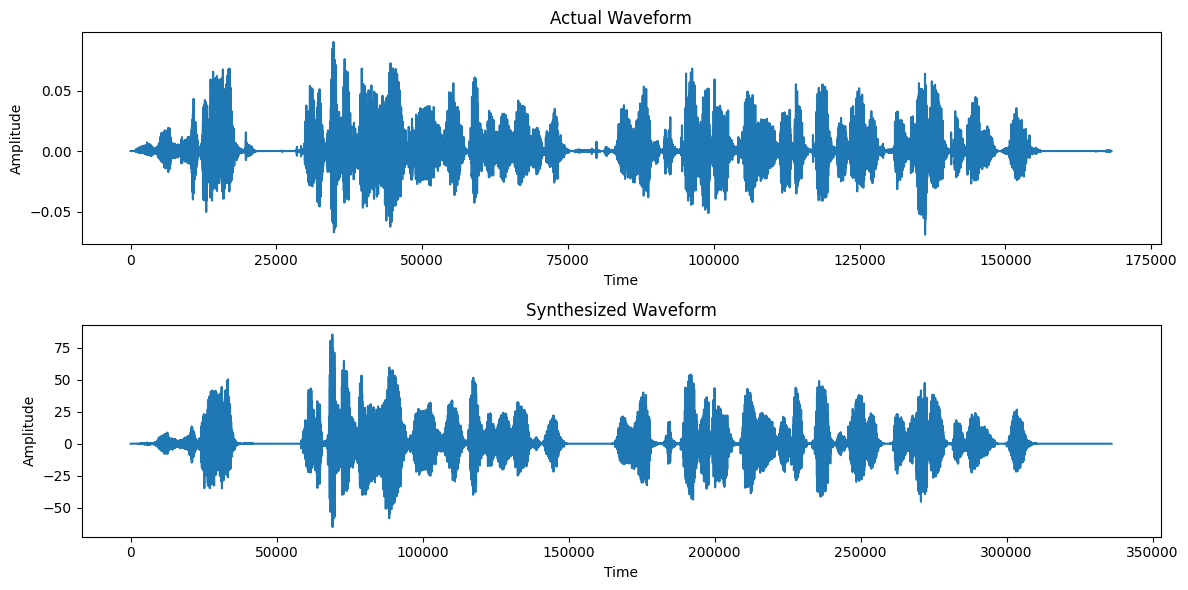

In [53]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def fourier(audio_file, window_size=1024, overlap=0.5):
    # Load the audio file
    audio, sr = librosa.load(audio_file)
    audio, _ = librosa.effects.trim(audio)

    # Initialize variables
    rss_errors = []
    all_synthesized_waveforms = []

    # Process the audio in chunks
    for i in range(0, len(audio), int(window_size * (1 - overlap))):
        chunk = audio[i:i+window_size]

        # Estimate the noise power spectrum
        noise_power_spectrum = estimate_noise_power_spectrum(chunk)

        # Apply the Wiener filter to reduce noise
        clean_chunk = wiener_filter(chunk, noise_power_spectrum)

        # Calculate the FFT
        fft = np.fft.fft(clean_chunk)

        # Extract the Fourier coefficients
        freqs = np.fft.fftfreq(len(clean_chunk), 1.0 / sr)
        amps = np.abs(fft)
        phases = np.angle(fft)

        # Synthesize the waveform using Fourier series
        t = np.linspace(0, len(clean_chunk) / sr, len(clean_chunk))
        synthesized_waveform = fourier_series(t, freqs, amps, phases)
        all_synthesized_waveforms.append(synthesized_waveform)

        # Calculate the RSS error
        def rss(signal1, signal2):
            return np.sqrt(np.sum((signal1 - signal2) ** 2))

        rss_error = rss(clean_chunk, synthesized_waveform)
        rss_errors.append(rss_error)

    # Calculate the average RSS error
    avg_rss_error = np.mean(rss_errors)

    # Concatenate all the synthesized waveforms
    synthesized_audio = np.concatenate(all_synthesized_waveforms)

    return rss_errors, synthesized_audio, audio

# Example usage
audio_path = r"C:\Users\alisa\Downloads\ali.wav"
rss_errors, synthesized_audio, actual_audio = fourier(audio_path)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(actual_audio)
plt.title('Actual Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(synthesized_audio)
plt.title('Synthesized Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()